# 量子探测器层析

*版权所有 (c) 2022 百度量子计算研究所，保留所有权利。*

## 内容概要

在迈向大规模量子计算的道路上，一个核心挑战就是量子测量的保真度。那么用来评估量子测量的保真度的方法就显得十分重要。量子探测器层析（Quantum Detector Tomography，QDT）就是一种可以用来精确刻画量子测量具体表达形式的方法。本教程将介绍量子探测器层析的理论及其在[百度量子平台](https://quantum.baidu.com/)上的实践。

## 理论
量子探测器层析的基本原理就是测量一组精确已知的量子态，由测量结果来重构测量算符的具体表达形式。

### 测量探测器方法
测量可以用一组 POVM $\left\{E_{m}\right\}_{m=1}^{M}$ 来描述，这里 $M=d^2$，$d = 2^n$，$n$ 表示量子比特数。选择一组量子态 $\left\{\rho_{n}\right\}_{n=1}^{N}$，这里的 $N\geq d^2$，这组量子态张成一个 Hilbert-Schmidt 空间。然后，我们对量子态进行测量，得到 $MN$ 个测量结果

$$
\begin{align}
\forall n \in \left[N\right], \;\forall m \in \left[M\right],\; p_{mn}:=\langle\langle E_m \vert \rho_n \rangle\rangle = \textrm{Tr}\left[E_m\rho_n\right].\label{PTM-1}
\end{align}
$$

$p_{mn}$ 表示了 $\rho_n$ 的测量结果为 $m$ 的概率，是实验上可以获得的值。

在上式中插入完备的 Pauli 基，则有

$$
\begin{align}
p_{mn}=\langle\langle E_m \vert \rho_n \rangle\rangle = \sum_{k=1}^{d^2}\langle\langle E_m\vert k\rangle\rangle\langle\langle k\vert \rho_n\rangle\rangle.\label{PTM-2}
\end{align}
$$

$p_{mn}$ 在实验上可以通过如下方法获取：统计输入态为 $\rho_n$，输出结果为 $m$ 的频率，记为 $f_{mn}$，则通过大数定理，我们可以有 $p_{mn} = f_{mn}/F_{\rm shots}$。$f_{mn}$ 满足归一化条件

$$
\begin{align}
\forall n \in \left[N\right], \sum_{m=1}^M f_{mn} = F_{\rm shots}.
\end{align}
$$

由于 $\left\{\rho_{n}\right\}_{n=1}^{N}$ 是在实验前就选取好了的，所以我们可以定义一个矩阵 $\mathfrak{P}$，它的表达式为

$$
\begin{align}
  \mathfrak{P} = \begin{bmatrix}
    \langle\langle \rho_1 | 1 \rangle\rangle
    & \langle\langle \rho_1 |  2 \rangle\rangle & \cdots
    & \langle\langle \rho_1 | d^2 \rangle\rangle \\
    \langle\langle \rho_2 | 1 \rangle\rangle
    & \langle\langle \rho_2 | 2 \rangle\rangle & \cdots
    & \langle\langle \rho_2 | d^2 \rangle\rangle \\
    \vdots & \vdots & \ddots & \vdots \\
    \langle\langle \rho_N | 1 \rangle\rangle
    & \langle\langle \rho_N | 2 \rangle\rangle & \cdots
    & \langle\langle \rho_N | d^2 \rangle\rangle
  \end{bmatrix}.
\end{align}
$$

类似地，我们也可以同样将未知的 POVM 定义为矩阵 $\mathfrak{M}$，它的表达式为

$$
\begin{align}
  \mathfrak{M} = \begin{bmatrix}
    \langle\langle E_1 | 1 \rangle\rangle
    & \langle\langle E_1 |  2 \rangle\rangle & \cdots
    & \langle\langle E_1 | d^2 \rangle\rangle \\
    \langle\langle E_2 | 1 \rangle\rangle
    & \langle\langle E_2 | 2 \rangle\rangle & \cdots
    & \langle\langle E_2 | d^2 \rangle\rangle \\
    \vdots & \vdots & \ddots & \vdots \\
    \langle\langle E_M | 1 \rangle\rangle
    & \langle\langle E_M | 2 \rangle\rangle & \cdots
    & \langle\langle E_M | d^2 \rangle\rangle
  \end{bmatrix}.
\end{align}
$$

QDT 要做的就是求出 $\mathfrak{M}$ 的每一个元素。

我们实验上得到的概率也可以写作矩阵的形式

$$
\begin{align}
  P = \begin{bmatrix}
    p_{11}
    & p_{12} & \cdots
    & p_{1N} \\
    p_{21}
    & p_{22} & \cdots
    & p_{2N} \\
    \vdots & \vdots & \ddots & \vdots \\
    p_{M1}
    & p_{M2} & \cdots
    & p_{MN}
  \end{bmatrix}.
\end{align}
$$

于是我们可以将问题建模成更简洁的矩阵形式

$$
\begin{align}
P = \mathfrak{M}\mathfrak{P}^\mathrm{T}.
\end{align}
$$

这是一个线性回归模型，已知 $P$ 和 $\mathfrak{P}$，求解 $\mathfrak{M}$。我们可以采取多种方法进行处理。

#### 求逆法

最直接的方法就是求逆法，如果选取的量子态 $\left\{\rho_n\right\}_n$ 可以使得 $\mathfrak{P}$ 可逆（此时 $N=d^2$），那么可以得到

$$
\begin{align}
\mathfrak{M} = P\left(\mathfrak{P}^\mathrm{T}\right)^{-1}.
\end{align}
$$

#### 最小二乘法

求逆法在 $N\geq d^2$ 的时候会失效，因为此时 $\mathfrak{P}$ 的行数比列数要多，不能求逆。为了解决这个问题，可以采用最小二乘法的方法

$$
\begin{align}
\mathfrak{M}^\ast := \operatorname*{argmin}_{\mathfrak{M}} \left\|{P-\mathfrak{M}\mathfrak{P}^\mathrm{T}}\right\|_2^2.
\end{align}
$$

这里的 $\left\|\cdot\right\|_2$ 是 Euclidean 范数。事实上，考虑到 $\mathfrak{P}$ 和 $P$ 的每一列都是线性独立的，上式存在解析解

$$
\begin{align}
&\quad    \mathfrak{M}\mathfrak{P}^T = P \\
\Rightarrow&\quad \mathfrak{M}\left(\mathfrak{P}^T\mathfrak{P}^*\right) = P\mathfrak{P}^* \\
\Rightarrow&\quad \mathfrak{M} = P\mathfrak{P}^* \left(\mathfrak{P}^T\mathfrak{P}^*\right)^{-1}.
\end{align}
$$

这里 $\mathfrak{P}^\ast$ 表示 $\mathfrak{P}$ 的复共轭，$\mathfrak{P}\mathfrak{P}^\dagger$ 是 Gram 矩阵并总是可逆的。

#### 最大似然估计

不管是求逆法还是最小二乘法，都存在一个严重问题，那就是求出来的 POVM 不一定满足半正定的要求。因此，可以使用最大似然估计的方法来避免这个问题。

似然函数被定义为

$$
\begin{align}
    \log\mathcal{L} := \sum_m\sum_n f_{mn}\log\textrm{Tr}\left[E_m\rho_n\right].
\end{align}
$$

下标 $n$ 表示一组信息完备的探测态。通过 Lagrange 乘子引入约束条件 $\sum_{m} E_m = I$。在这个最大似然估计问题里，$\left\{E_m\right\}$ 就是要被估计的参数，每一个事件 $\left(m, n\right)$，输入态 $\rho_n$ 和观测到的输出 $m$ 对应一个独立似然函数

$$
\begin{align}
    \mathcal{L}\left(\left\{E_m\right\}\vert \left(m,n\right)\right) = P\left(\left(m,n\right)\vert\left\{E_m\right\}\right) = \textrm{Tr}\left[E_m\rho_n\right].
\end{align}
$$

总共有 $F_{\rm shots}\times N$ 个事件，记为 $\left\{\left(m_k,n_k\right)\right\}_{k=1}^{F_{\rm shots}\times N}$，对应的全局似然函数写作

$$
\begin{align}
  \mathcal{L}\left(\left\{E_m\right\}\vert\left\{\left(m_k,n_k\right)\right\}\right)
= \prod_{\left(m_k,n_k\right)}\mathcal{L}\left(\left\{E_m\right\}\vert \left(m_k,n_k\right)\right)
= \prod_{m,n}\textrm{Tr}\left[E_m\rho_n\right]^{f_{mn}}.
\end{align}
$$

令上式最大化可以得到

$$
\begin{align}\tag{1}\label{qdt}
    E_m = R_n E_m R_n^\dagger,
\end{align}
$$

其中

$$
\begin{align}\tag{2}\label{qdt-2}
  R_m
= \left(\sum_{m'}\sum_{n,n'}\frac{f_{m'n}f_{m'n'}}{\hat{p}_{m'n}\hat{p}_{m'n'}}\rho_nE_{m'}\rho_{n'}\right)^{-\frac{1}{2}}
	\left(\sum_n\frac{f_{mn}}{\hat{p}_{mn}}\rho_n\right),
\end{align}
$$

$\hat{p}_{mn} = \textrm{Tr}\left[E_m\rho_n\right]$ 是输入态 $\rho_n$ 得到测量结果 $m$ 的理论值。式子 $\eqref{qdt}$ 给出了估计 POVM 的迭代过程，每一次迭代先根据式子 $\eqref{qdt}$ 更新 $E_m$，然后根据式子 $\eqref{qdt-2}$ 计算下一次迭代用到的 $R_m$。终止条件可以设置为

$$
\begin{align}
    \max_{m} \left\|{E_m^{\left(k\right)} - E_m^{\left(k+1\right)}}\right\|_2 \leq \varepsilon,
\end{align}
$$

其中，上标表示第 $k$ 和 $k+1$ 次迭代。只要初始条件 $\left\{E_{m}^{\left(0\right)}\right\}$ 满足半正定和归一化条件，那么迭代计算出来的 POVM 也满足半正定性质和归一化条件。我们选择 $\left\{E_{m}^{\left(0\right)}\right\} = \frac{I}{d}$。值得指出的是 $\varepsilon$ 应该足够小以便该截止引入的数值误差小于统计波动引起的估计参数的不确定性。

最后我们来回顾一下整个流程：
 
![QPT](./figures/qdt-chart.png "图1：QDT 流程图")

## 实践

下面我们将演示如何对一个测量设备进行层析。

首先，我们导入一些必要的包。

In [1]:
from qcompute_qep.tomography.detector_tomography import DetectorTomography, visualization
from QCompute import *

探测器层析是对测量设备进行精确刻画的方法，所以我们首先需要创建一个包含测量的量子电路，以两比特量子系统为例，

In [2]:
n = 2
qp = QEnv()
qp.Q.createList(n)

接下来我们需要选择量子计算机的类型，可以选择模拟器或量子计算机真机，这里我们选择的是百度量子真机。剩下的步骤就很简单了，只需要调用我们的 DetectorTomography 模块则可完成真实量子测量的层析，和 QST 类似，我们选择求逆的方式对量子测量的 POVM 进行求解。除了求逆法，上面提到的最小二乘法以及最大似然估计方法在我们的 DetectorTomography 模块中也有实现。

In [3]:
# Please login the "Quantum Leaf" platform (https://quantum-hub.baidu.com/) to get Token
Define.hubToken = "Token"

qc = BackendName.CloudBaiduQPUQian
# Initialize a DetectorTomography instance
detec = DetectorTomography()

# Call the tomography procedure and obtain the POVM.
# Other supported methods are 'lstsq', 'mle'.
meas = detec.fit(qp=qp, qc=qc, method='inverse', shots=8192)
print('POVM', meas)

Step 1/3 : Constructing quantum circuits...: 100%|█| 100.0/100 [00:00<00:00, 927
Step 2/3 : Collecting experiment results...: 100%|█| 100.0/100 [00:00<00:00, 925

Step 3/3 : Working on INVERSE method...
POVM [array([[ 1.00000000e+00+0.00000000e+00j,  7.56835937e-03+7.44628906e-03j,
        -7.32421875e-03+1.34277344e-03j, -1.14746094e-02-6.95800781e-03j],
       [ 7.56835937e-03-7.44628906e-03j, -5.55111512e-17+0.00000000e+00j,
         7.56835938e-03+4.15039063e-03j, -4.90493063e-16+4.40836603e-16j],
       [-7.32421875e-03-1.34277344e-03j,  7.56835938e-03-4.15039063e-03j,
        -4.44089210e-16+0.00000000e+00j, -2.90566182e-16+2.10335221e-16j],
       [-1.14746094e-02+6.95800781e-03j, -4.90493063e-16-4.40836603e-16j,
        -2.90566182e-16-2.10335221e-16j,  1.66533454e-16+0.00000000e+00j]]), array([[-5.82867088e-16+0.00000000e+00j, -7.56835937e-03-7.44628906e-03j,
        -8.10170073e-17+1.04950770e-16j,  9.46044922e-03-4.82177734e-03j],
       [-7.56835937e-03+7.44628906e-03j,  1.00000000e+00+0.00000000e+00j,
         1.77001953e-03+3.35693359e-03j, -4.88281250e-04+3.41796875e-03j],
       [-8.10170073e-17-1.04950770e-16j,  1.77001953e-03-3

值得一提的是，我们的模块可以很方便地对指定比特的测量算符进行层析，只需要加上 **qubits** 变量即可，调用方法如下

In [ ]:
# meas = detec.fit(qp=qp, qc=qc, method='inverse', shots=8192, qubits=[1])

接下来我们来看一下测量保真度（measurement fidelity），它的表达式如下

$$
\begin{align}
    f\left(\mathcal{M}\right) := \frac{1}{2^n}\sum_{\mathbf{x}\in\left\{0,1\right\}^n}\langle \mathbf{x}\vert\Pi_{\mathbf{x}}\vert\mathbf{x}\rangle.
\end{align}
$$

需要指出的是，这里的测量保真度是关于计算基础上的理想测量。

In [4]:
fid = detec.fidelity
print('Fidelity of the POVM: F = {:.5f}'.format(fid))

Fidelity of the POVM: F = 1.00000


也可以将层析结果进行可视化，我们在这里对 POVM 元 $E_{00}$ 进行可视化

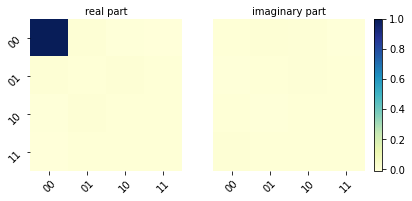

In [5]:
visualization(meas[0])

## 总结

本教程旨在介绍 QDT 的原理以及如何在[百度量子平台](https://quantum.baidu.com/)上实现。

## 参考资料
[1] Greenbaum, Daniel. "Introduction to quantum gate set tomography." [arXiv](https://arxiv.org/abs/1509.02921) preprint arXiv:1509.02921 (2015).

[2] Fiurášek, Jaromír. "Maximum-likelihood estimation of quantum measurement." [Physical Review A](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.64.024102) 64.2 (2001): 024102.

[3] Chen, SY Yanzhu, Maziar Farahzad, and T. C. Wei. "Detector tomography on ibm 5-qubit quantum computers and mitigation of imperfect measurement, arXiv (2019)." [arXiv](https://arxiv.org/abs/1904.11935) preprint arXiv:1904.11935.